In [ ]:
import os  
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import matplotlib.dates as mdates
from datetime import datetime

In [ ]:
# df = pd.read_csv('/work/2023-06-01 hourly data/altaeros_flight_data_20230601.csv')

In [ ]:
# Step 2: Filter the DataFrame for the desired times (e.g., between 00:00:00 and 05:37:01 "target altitude 250m")
dfs1 = pd.read_csv('altaeros_flight_data_20230418.csv')
dfs1['Time'] = pd.to_datetime(dfs1['Time'])
start_time = pd.to_datetime('2023-04-18 00:00:00')
end_time = pd.to_datetime('2023-04-18 05:37:01')
dfs = dfs1[(dfs1['Time'] >= start_time) & (dfs1['Time'] <= end_time)]

## Data Visualization

In [ ]:
dfs.tail(10)

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC
19985,2023-04-18 05:36:52,250.386558,1518.033941,888.431393,943.210460,1.654160,211.583086,1.036688,267.252832,6.577719,12.939844,22.062422,87054.963835,17.651900,16.779669
19986,2023-04-18 05:36:53,250.391287,1527.724319,865.102601,941.662739,1.811905,188.972533,0.392035,55.582371,-22.174212,12.939844,22.095992,87054.963835,17.651900,16.779669
19987,2023-04-18 05:36:54,250.370748,1553.267433,871.301053,934.871880,1.978091,188.994506,0.276060,95.700806,-13.423992,13.040555,21.778600,87064.729758,17.612226,16.794929
19988,2023-04-18 05:36:55,250.303388,1532.603021,862.669015,937.658186,2.102213,166.043367,0.313235,277.785688,-0.587758,13.049711,22.025799,87061.067537,17.621382,16.794929
19989,2023-04-18 05:36:56,250.231193,1533.165636,832.442698,916.197529,2.190823,188.994506,0.049653,123.510941,-78.030767,13.049711,22.025799,87067.171239,17.636641,16.755254
19990,2023-04-18 05:36:57,250.196213,1524.697980,841.307760,922.764669,2.228898,188.994506,0.246639,97.097980,-19.351847,13.034451,22.031903,87067.171239,17.621382,16.779669
19991,2023-04-18 05:36:58,250.136438,1529.221240,883.140724,941.839679,2.273010,188.939573,0.751082,259.304256,11.053188,12.915429,22.047162,87051.301614,17.621382,16.794929
19992,2023-04-18 05:36:59,250.052456,1526.651898,846.770665,958.362270,2.321290,166.076327,0.281487,252.774018,9.998693,12.915429,22.126510,87045.197912,17.651900,16.794929
19993,2023-04-18 05:37:00,249.987704,1529.511687,854.794813,941.912896,2.382218,188.972533,1.278141,86.926269,-13.950255,12.930688,22.080733,87048.860133,17.636641,16.764410
19994,2023-04-18 05:37:01,249.967583,1481.102450,874.381029,946.810286,2.452029,165.988433,0.305567,243.421436,-0.144823,12.921533,22.041059,87080.599383,17.612226,16.794929


In [ ]:
dfs1.head(5)

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,humidity_air_pct,temperature_air_degC,pressure_ground_Pa,humidity_ground_pct,temperature_ground_degC
0,2023-04-18 00:03:47,249.592489,599.078995,481.503748,383.722249,2.608974,166.153233,0.374213,139.015679,-4.845484,11.420023,26.426567,86945.097201,10.269475,28.907721
1,2023-04-18 00:03:48,249.576457,600.196100,473.204023,400.185860,2.631231,144.542466,0.472110,171.000917,0.681678,11.395608,26.411308,86985.381633,10.287786,28.892462
2,2023-04-18 00:03:49,249.556993,623.685771,434.943427,343.847567,2.687349,166.153233,0.788323,194.816997,0.737771,11.413919,26.441826,86915.799432,10.278631,28.883306
3,2023-04-18 00:03:50,249.582186,626.807572,390.245275,362.987658,2.751923,166.186193,0.772669,200.965701,1.750261,11.523786,26.417412,86975.615710,10.293890,29.042003
4,2023-04-18 00:03:51,249.607175,606.551412,371.469579,343.133703,2.813198,144.487533,0.440731,200.794258,0.861052,11.508526,26.411308,86915.799432,10.193179,29.017588


In [ ]:
# df.shape

In [ ]:
# in_flight = df.loc[df['altitude_m']>10]

In [ ]:
dfs.shape

(19995, 15)

In [ ]:
# # Read in a certain range of the imported data
# speed = df['wind_speed_air_NED_mPs'].iloc[0::400]  
# time = df['Time'].iloc[0::400]
# altitude=df['altitude_m'].iloc[0::400]
# afttension=df['tension_aft_N'].iloc[0::400]
# # Plot the data 
# fig, ax = plt.subplots() 
# plt.plot(time, speed, color='red', linewidth=1)
# # # Customize the x-axis tick labels
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # # Rotate the x-axis tick labels for better readability (optional)
# # plt.xticks(rotation=45)
# # Add axis labels and a title
# plt.xlabel("Time")
# plt.ylabel("Speed in Air")  
# plt.title("Wind Speed in Flight vs Time")


# plt.figure()
# plt.plot(time, altitude)    
# plt.xlabel("Time")
# plt.ylabel("Altitude")
# plt.title("Altitude vs. Time")

# plt.figure()
# plt.plot(time, afttension, color='blue', linewidth=1)
# plt.xlabel("Time")
# plt.ylabel("Aft tension")
# # Show the plot
# plt.show()

In [ ]:
# #Tension in tethers compared to wind speed
# speedair = in_flight['wind_speed_air_NED_mPs'].iloc[0::400]  
# time = in_flight['Time'].iloc[0::400]
# afttension=in_flight['tension_aft_N'].iloc[0::400] 
# startension=in_flight['tension_starboard_N'].iloc[0::400]
# porttension = in_flight['tension_port_N'].iloc[0::400]
# # plt.figure()
# # plt.plot(time, speedair, color='red', linewidth=1)

# # #Add axis labels and a title
# # plt.xlabel("Time")
# # plt.ylabel("Speed in air")
# # plt.title("Speed vs Time")
# # # Create figure and axes
# fig, ax = plt.subplots()

# # Plot aft tension    
# ax.plot(time, afttension, color='red',linewidth=0.5, label="Aft Tension")

# # Plot starboard tension
# ax.plot(time, startension , color='black',linewidth=0.5, label="Starboard Tension")

# # Plot port tension
# ax.plot(time, porttension, color='blue',linewidth=0.5, label="Port Tension")

# # Add legend
# # ax.legend(handles=[line1[0], line2[0], line3[0]])

# # Set axis labels
# ax.set_xlabel("Time")   
# ax.set_ylabel("Tension")

# # Add title
# ax.set_title("Tension vs Time")
# # # Customize the x-axis tick labels
# # ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # # Rotate the x-axis tick labels for better readability (optional)
# # plt.xticks(rotation=45)

# # Show plot
# plt.show()

In [ ]:
# # TENSION RATES
# df = pd.read_csv('/work/2023-06-01 hourly data/altaeros_flight_data_20230601.csv')

# # Calculate total tension
# df['total_tension'] = df['tension_aft_N'] + df['tension_port_N'] + df['tension_starboard_N']

# # Convert the 'Time' column to datetime
# df['Time'] = pd.to_datetime(df['Time'])
# time = df['Time'][::20]
# # Calculate tension ratios
# df['aft_ratio'] = df['tension_aft_N'] / df['total_tension'] 
# df['port_ratio'] = df['tension_port_N'] / df['total_tension']
# df['starboard_ratio'] = df['tension_starboard_N'] / df['total_tension']

# # Calculate rate of change of tension ratios(per second)
# #assume that 20 data points are taken per second to taking the difference of every 20th point would be the gradient but then plotting has to be a multiple of 20
# df['aft_ratio_rate'] = (df['aft_ratio'][::20].diff())
# df['port_ratio_rate'] = (df['port_ratio'][::20].diff())
# df['starboard_ratio_rate'] = (df['starboard_ratio'][::20].diff())

# fig, ax = plt.subplots(1, 1)

# ax.plot(df['Time'][::400], df['aft_ratio_rate'][::400],color='red',linewidth=0.5, label='Aft Rate of Change')
# ax.plot(df['Time'][::400], df['port_ratio_rate'][::400],color='blue',linewidth=0.5, label='Port Rate of Change')
# ax.plot(df['Time'][::400], df['starboard_ratio_rate'][::400],color='black',linewidth=0.5, label='Starboard Rate of Change')

# # # Plot aft tension ratio rate of change
# # plt.plot(df['Time'][::400], df['aft_ratio_rate'][::400])  
# plt.xlabel('Time')
# plt.ylabel('Tension Ratio Rate of Change')  
# # Add legend 
# ax.legend(loc='upper left')  
# ax.set_title("Tension Rate vs Time") 
# # Customize the x-axis tick labels
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# # TENSION RATIOS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# fig, ax3 = plt.subplots(1, 1)
# ax3.plot(df['Time'][::400], df['aft_ratio'][::400],color='red',linewidth=0.5, label='Aft Ratio')
# ax3.plot(df['Time'][::400], df['port_ratio'][::400],color='blue',linewidth=0.5, label='Port Ratio')
# ax3.plot(df['Time'][::400], df['starboard_ratio'][::400],color='black',linewidth=0.5, label='Starboard Ratio')
# plt.xlabel('Time')
# plt.ylabel('Tension Ratio')  
# # Add legend 
# ax3.legend(loc='upper left')  
# ax3.set_title("Tension Ratio vs Time") 
# # Customize the x-axis tick labels
# ax3.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# plt.show()
# df.head(5)


In [ ]:
# # WIND ELEVATION
# elevation = df['wind_elevation_air_NED_deg'].iloc[0::400]  
# time = df['Time'].iloc[0::400]
# altitude=df['altitude_m'].iloc[0::400]
# # Plot the data 
# plt.figure()  
# plt.plot(time, elevation, color='red', linewidth=1)
# # Add axis labels and a title
# plt.xlabel("Time")
# plt.ylabel("Wind Elevation(degrees)")  
# plt.title("Wind elevation vs Time")

# # Customize the x-axis tick labels
# ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)

# plt.show()

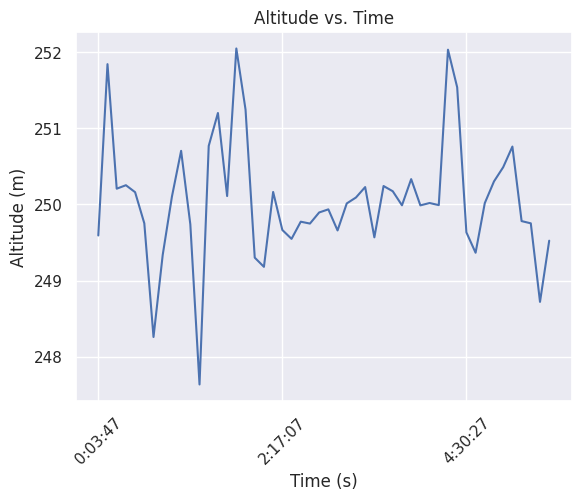

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# #Altitiude 
altitude = dfs['altitude_m'].iloc[0::400]  
time = dfs['Time'].iloc[0::400]

# Convert times to datetime objects   
time = [t.strftime("%d-%b-%Y %H:%M:%S") for t in time]     
time = [datetime.strptime(t, "%d-%b-%Y %H:%M:%S") for t in time]
# Plot the data
plt.figure()    
plt.plot(time, altitude)

# Set x ticks to show hours:minutes:seconds
plt.xticks(time[::20], ["%d:%02d:%02d" % (t.hour, t.minute, t.second) for t in time[::20]], rotation=45)

plt.xlabel("Time (s)")  
plt.ylabel("Altitude (m)")
plt.title("Altitude vs. Time")

# Show plot
plt.show() 

### Updated Graph Axis

/tmp/ipykernel_167/1559378603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['speed_diff_air'] = dfs['wind_speed_air_NED_mPs'].diff()


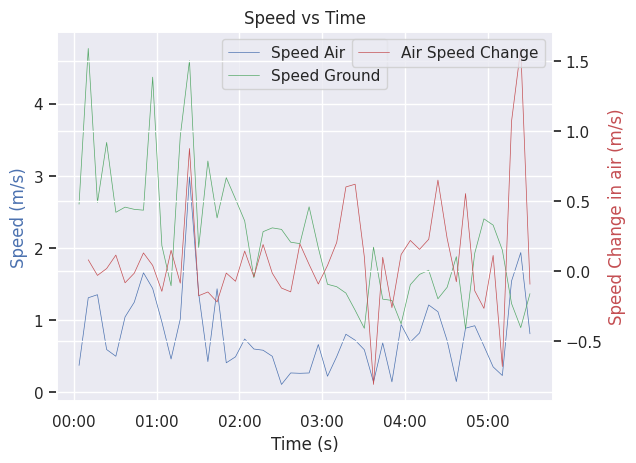

/tmp/ipykernel_167/1559378603.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['temperature_difference']=dfs['temperature_air_degC']-dfs['temperature_ground_degC']
/tmp/ipykernel_167/1559378603.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pressureground_rate'] = (dfs['pressure_ground_Pa'].diff())
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/axes/_base.py:2538: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


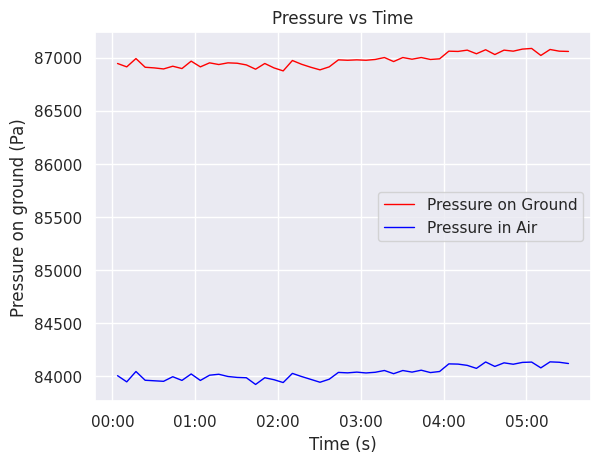

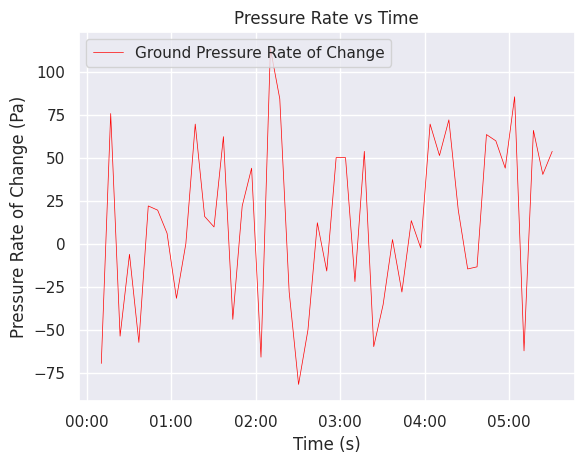

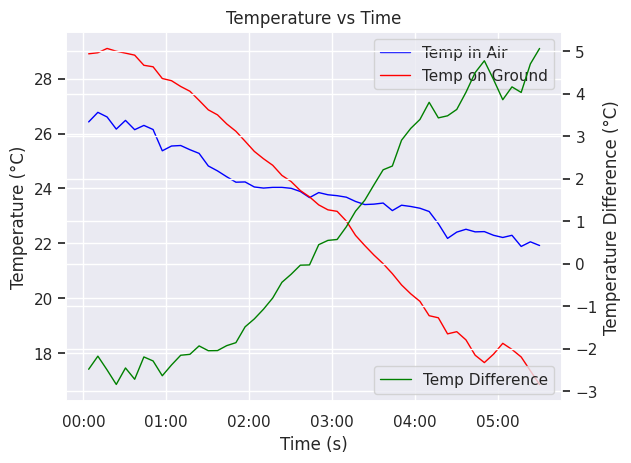

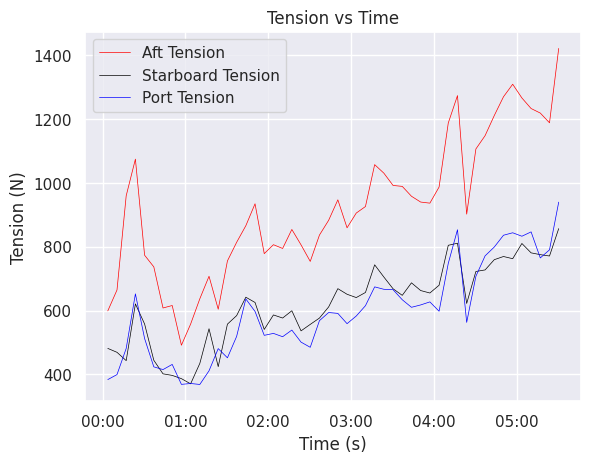

/tmp/ipykernel_167/1559378603.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Time'] = pd.to_datetime(dfs['Time'])
/tmp/ipykernel_167/1559378603.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Humidity_Difference']=dfs['humidity_ground_pct']-dfs['humidity_air_pct']


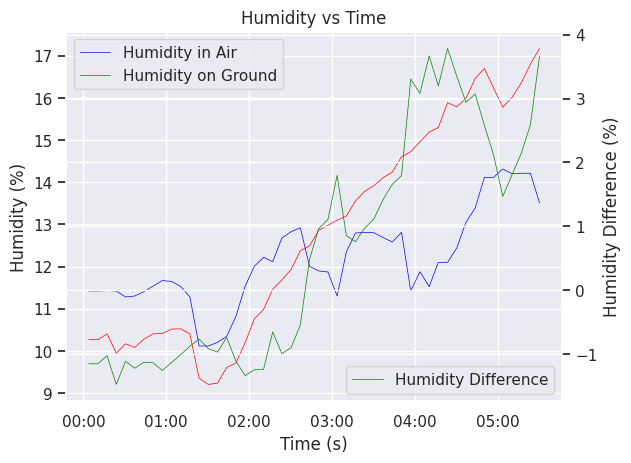

/tmp/ipykernel_167/1559378603.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['total_tension'] = dfs['tension_aft_N'] + dfs['tension_left_N'] + dfs['tension_right_N']
/tmp/ipykernel_167/1559378603.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Time'] = pd.to_datetime(dfs['Time'])
/tmp/ipykernel_167/1559378603.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

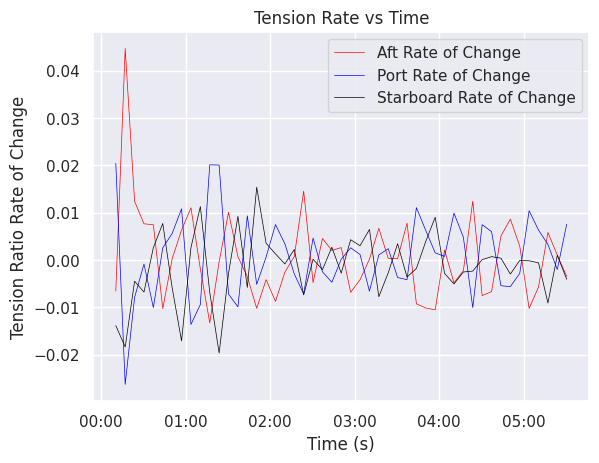

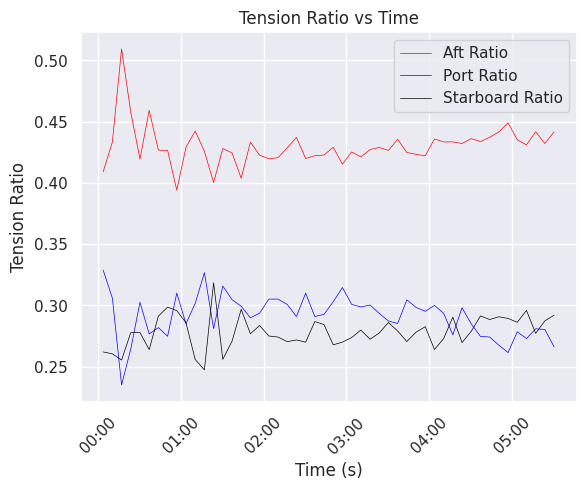

In [ ]:
#SPEED VS TIME
# Calculate difference between consecutive data points 
speedair = dfs['wind_speed_air_NED_mPs'].iloc[0::400]
time = dfs['Time'].iloc[0::400]  
speedground = dfs['wind_speed_ground_NED_mPs'].iloc[0::400]
#Calculate rate of change of speed
dfs['speed_diff_air'] = dfs['wind_speed_air_NED_mPs'].diff()
speeddiff=dfs['speed_diff_air'].iloc[0::400]
fig, ax1 = plt.subplots()
# Plot original speed vs time on primary y-axis
ax1.plot(time, speedair, color='b', linewidth=0.5, label='Speed Air')
ax1.plot(time, speedground, color='g', linewidth=0.5, label='Speed Ground')
ax1.set_ylabel('Speed (m/s)', color='b')

# Create secondary y-axis
ax2 = ax1.twinx()
# Plot difference on secondary y-axis 
ax2.plot(time, speeddiff, color='r', linewidth=0.5, label='Air Speed Change')
ax2.set_ylabel('Speed Change in air (m/s)', color='r')

ax1.set_xlabel('Time (s)')
ax1.set_title('Speed vs Time')
ax1.legend(loc="upper center")
ax2.legend(loc="upper right")
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# Show plot  
plt.show()






# PRESSURE VS TIME
pressureground = dfs['pressure_ground_Pa'].iloc[0::400]
altitude = dfs['altitude_m'].iloc[0::400]
pressureair = pressureground - (1.2*9.81*altitude)
time = dfs['Time'].iloc[0::400]  
tempground = dfs['temperature_ground_degC'].iloc[0::400]  
tempair = dfs['temperature_air_degC'].iloc[0::400] 
dfs['temperature_difference']=dfs['temperature_air_degC']-dfs['temperature_ground_degC']
tempdiff = tempair - tempground
fig, ax1 = plt.subplots(1, 1)
# Plot the data 
ax1.plot(time, pressureground, color='red', linewidth=1, label='Pressure on Ground')
ax1.plot(time, pressureair, color='blue', linewidth=1, label='Pressure in Air')
ax1.set_xlabel("Time (s)")
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#Add legends
ax1.legend(loc='center right')
# Add axis labels and a title
plt.xlabel("Time (s)")
plt.ylabel("Pressure on ground (Pa)")  
plt.title("Pressure vs Time")



# PRESSURE RATE VS TIME
time = dfs['Time']
dfs['pressureground_rate'] = (dfs['pressure_ground_Pa'].diff())
fig, ax = plt.subplots(1, 1)
ax.plot(dfs['Time'][::400], dfs['pressureground_rate'][::400],color='red',linewidth=0.5, label='Ground Pressure Rate of Change')
plt.xlabel('Time (s)')
plt.ylabel('Pressure Rate of Change (Pa)')  
# Add legend 
ax.legend(loc='upper left')  
ax.set_title("Pressure Rate vs Time") 
# # Customize the x-axis tick labels
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM




#TEMPERATURE VS TIME
fig, ax = plt.subplots()
time = dfs['Time'].iloc[0::400] 
ax1 = ax.twinx()
ax.plot(time,tempair, color='blue', linewidth=1, label='Temp in Air')
ax.plot(time, tempground, color='red', linewidth=1, label='Temp on Ground')
ax.set_xlabel("Time (s)")
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature vs Time")
ax1.plot(time, tempdiff, color='green', linewidth=1, label='Temp Difference')
ax1.set_ylabel("Temperature Difference (°C)")
# Add horizontal line at y=0
ax1.hlines(y=0, xmin=-np.inf, xmax=np.inf, colors='yellow', linewidth=1)
#Add legends
ax.legend(loc='upper right')
ax1.legend(loc='lower right')
# # Customize the x-axis tick labels
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
plt.show()





#TENSION in tethers compared to wind speed
speedair = dfs['wind_speed_air_NED_mPs'].iloc[0::400]  
time = dfs['Time'].iloc[0::400]
afttension=dfs['tension_aft_N'].iloc[0::400] 
startension=dfs['tension_left_N'].iloc[0::400]
porttension = dfs['tension_right_N'].iloc[0::400]
fig, ax = plt.subplots()
# Plot aft tension    
ax.plot(time, afttension, color='red',linewidth=0.5, label="Aft Tension")
# Plot starboard tension
ax.plot(time, startension , color='black',linewidth=0.5, label="Starboard Tension")
# Plot port tension
ax.plot(time, porttension, color='blue',linewidth=0.5, label="Port Tension")
# Set axis labels
ax.set_xlabel("Time (s)")   
ax.set_ylabel("Tension (N)")
# Add title
ax.set_title("Tension vs Time")
# # Customize the x-axis tick labels
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
ax.legend(loc='upper left')
# Show plot
plt.show()







###########################################################################

# HUMIDITY VS TIME
humidair = dfs['humidity_air_pct'].iloc[0::400]
dfs['Time'] = pd.to_datetime(dfs['Time'])
time = dfs['Time'].iloc[0::400]  
humidground = dfs['humidity_ground_pct'].iloc[0::400] 
dfs['Humidity_Difference']=dfs['humidity_ground_pct']-dfs['humidity_air_pct']
humdiff = humidground - humidair
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(time,humidair, color='blue', linewidth=0.5, label='Humidity in Air')
ax.plot(time, humidground, color='red', linewidth=0.5, label='Humidity on Ground')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Humidity (%)")
ax.set_title("Humidity vs Time")
ax1.plot(time, humdiff, color='green', linewidth=0.5, label='Humidity Difference')
ax1.set_ylabel("Humidity Difference (%)")
#Add legends
ax.legend(loc='upper left')
ax1.legend(loc='lower right')
# # Customize the x-axis tick labels
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval= 10))  # Set the minor interval to 10 minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
plt.show()




# TENSION RATES VS TIME
# Calculate total tension
dfs['total_tension'] = dfs['tension_aft_N'] + dfs['tension_left_N'] + dfs['tension_right_N']
# Convert the 'Time' column to datetime
dfs['Time'] = pd.to_datetime(dfs['Time'])
time = dfs['Time']
# Calculate tension ratios
dfs['aft_ratio'] = dfs['tension_aft_N'] / dfs['total_tension'] 
dfs['left_ratio'] = dfs['tension_left_N'] / dfs['total_tension']
dfs['right_ratio'] = dfs['tension_right_N'] / dfs['total_tension']
# Calculate rate of change of tension ratios(per second)
#assume that 20 data points are taken per second to taking the difference of every 20th point would be the gradient but then plotting has to be a multiple of 20
dfs['aft_ratio_rate'] = (dfs['aft_ratio'].diff())
dfs['left_ratio_rate'] = (dfs['left_ratio'].diff())
dfs['right_ratio_rate'] = (dfs['right_ratio'].diff())
fig, ax = plt.subplots(1, 1)
# Customize the x-axis tick labels
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
ax.plot(dfs['Time'][::400], dfs['aft_ratio_rate'][::400],color='red',linewidth=0.5, label='Aft Rate of Change')
ax.plot(dfs['Time'][::400], dfs['left_ratio_rate'][::400],color='blue',linewidth=0.5, label='Port Rate of Change')
ax.plot(dfs['Time'][::400], dfs['right_ratio_rate'][::400],color='black',linewidth=0.5, label='Starboard Rate of Change')
# Plot aft tension ratio rate of change
plt.xlabel('Time (s)')
plt.ylabel('Tension Ratio Rate of Change')  
# Add legend 
ax.legend(loc='upper right')  
ax.set_title("Tension Rate vs Time") 
# # Rotate the x-axis tick labels for better readability (optional)
# plt.xticks(rotation=45)





# TENSION RATIOS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig, ax3 = plt.subplots(1, 1)
ax3.plot(dfs['Time'][::400], dfs['aft_ratio'][::400],color='red',linewidth=0.5, label='Aft Ratio')
ax3.plot(dfs['Time'][::400], dfs['left_ratio'][::400],color='blue',linewidth=0.5, label='Port Ratio')
ax3.plot(dfs['Time'][::400], dfs['right_ratio'][::400],color='black',linewidth=0.5, label='Starboard Ratio')
plt.xlabel('Time (s)')
plt.ylabel('Tension Ratio')  
# Add legend 
ax3.legend(loc='upper right')  
ax3.set_title("Tension Ratio vs Time") 
# Customize the x-axis tick labels
ax3.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))  # Set the minor interval to 10 minutes
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the tick labels as HH:MM
# Rotate the x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()


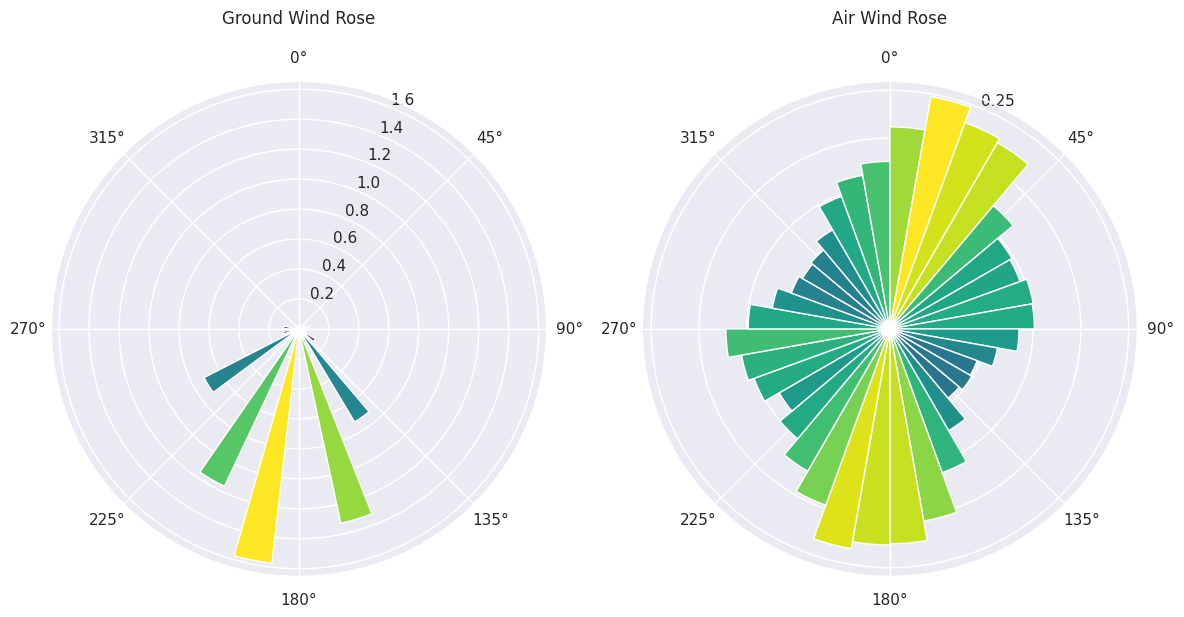

In [ ]:
# WIND ROSE PLOTS(Entire data)
# Load the new data

data_new = pd.read_csv('altaeros_flight_data_20230418.csv')

# Convert wind speed and direction to arrays for the new data
ws_ground_new = data_new['wind_speed_ground_NED_mPs'].dropna().values
wd_ground_new = data_new['wind_direction_ground_NED_deg'].dropna().values

ws_air_new = data_new['wind_speed_air_NED_mPs'].dropna().values
wd_air_new = data_new['wind_direction_air_NED_deg'].dropna().values

# Convert wind direction from degrees to radians for the new data
wd_ground_rad_new = np.deg2rad(wd_ground_new)
wd_air_rad_new = np.deg2rad(wd_air_new)

# Create a new figure
plt.figure(figsize=(12, 6))
n_bins = 36
# Create the ground wind rose plot for the new data
ax = plt.subplot(121, polar=True)
ax.set_title('Ground Wind Rose', y=1.1)
counts, bins, patches = ax.hist(wd_ground_rad_new, bins=n_bins, weights=ws_ground_new, density=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Color the bars based on their height
for count, patch in zip(counts, patches):
    patch.set_facecolor(plt.cm.viridis(count / max(counts)))

# Create the air wind rose plot for the new data
ax = plt.subplot(122, polar=True)
ax.set_title('Air Wind Rose', y=1.1)
counts, bins, patches = ax.hist(wd_air_rad_new, bins=n_bins, weights=ws_air_new, density=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Color the bars based on their height
for count, patch in zip(counts, patches):
    patch.set_facecolor(plt.cm.viridis(count / max(counts)))

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

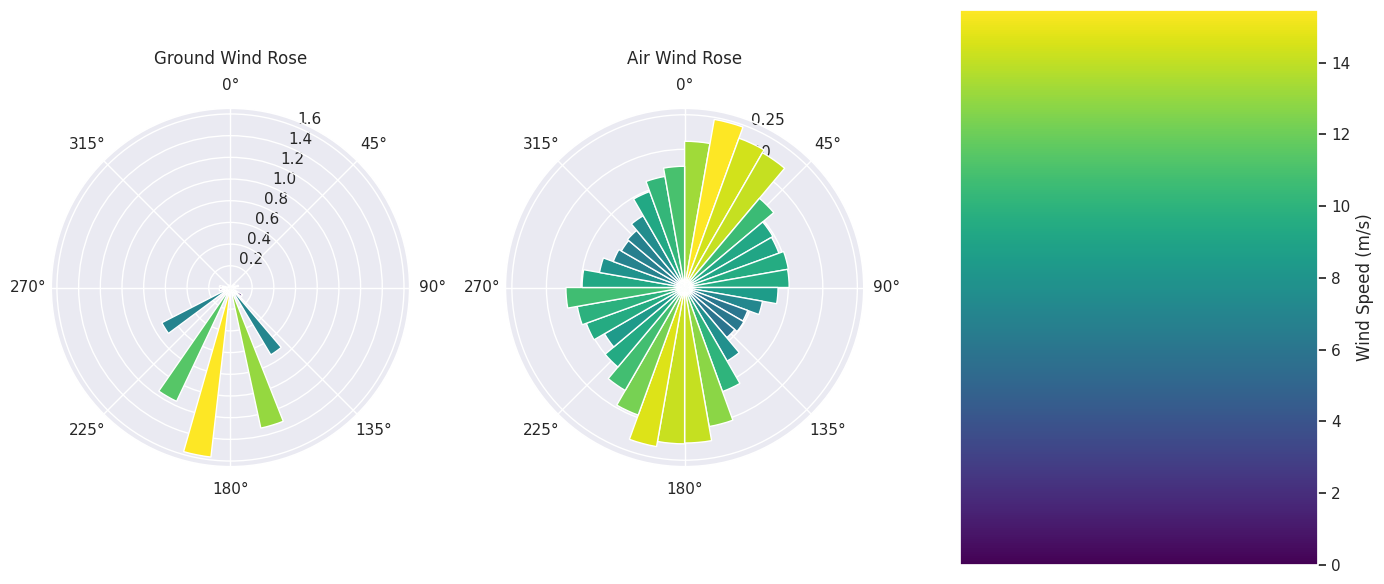

In [ ]:
#key added
from matplotlib.colorbar import ColorbarBase
from matplotlib import colors
# Define maximum wind speed for color normalization
max_wind_speed = max(np.max(ws_ground_new), np.max(ws_air_new))
# Create a new figure with subplots for the wind roses and the color bar
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(131, polar=True)
ax2 = fig.add_subplot(132, polar=True)
ax3 = fig.add_subplot(133)

# Create the ground wind rose plot
ax1.set_title('Ground Wind Rose', y=1.1)
counts, bins, patches = ax1.hist(wd_ground_rad_new, bins=n_bins, weights=ws_ground_new, density=True)
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)

# Color the bars based on their height and create a color bar
for count, patch in zip(counts, patches):
    color = plt.cm.viridis(count / max(counts))
    patch.set_facecolor(color)

# Create the air wind rose plot
ax2.set_title('Air Wind Rose', y=1.1)
counts, bins, patches = ax2.hist(wd_air_rad_new, bins=n_bins, weights=ws_air_new, density=True)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

# Color the bars based on their height
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=0, vmax=max_wind_speed)
for count, patch in zip(counts, patches):
    color = plt.cm.viridis(count / max(counts))
    patch.set_facecolor(color)

# Generate a color bar
cbar = ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='vertical')

cbar.set_label('Wind Speed (m/s)')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

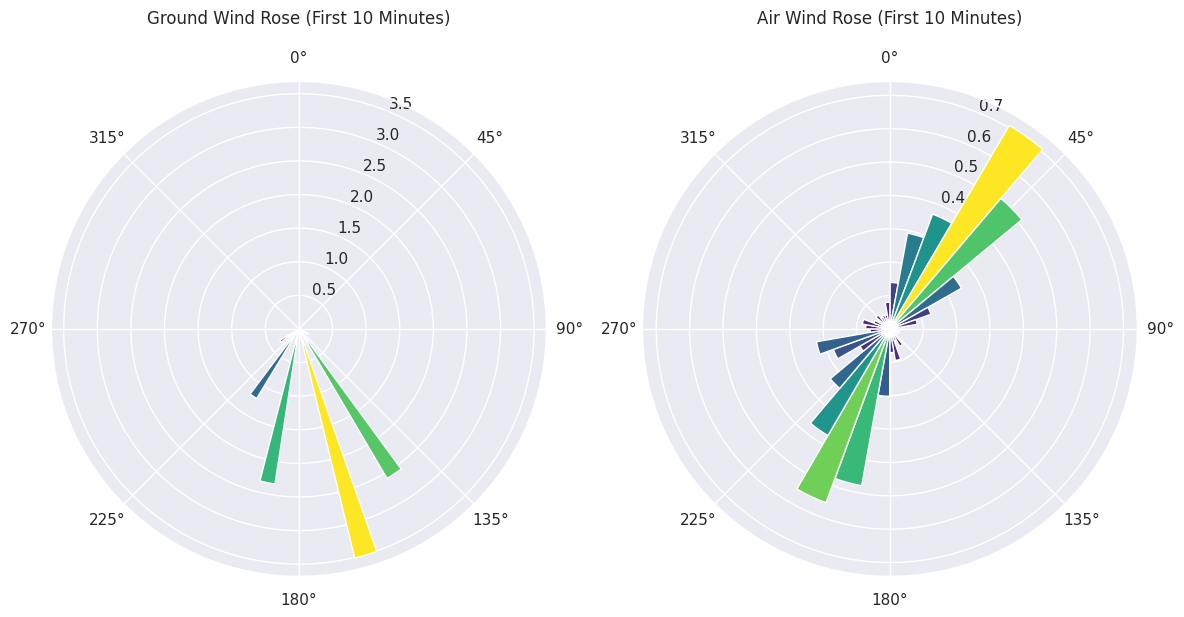

In [ ]:
#WIND ROSE specific time period
#Convert 'Time' column to datetime
data_new['Time'] = pd.to_datetime(data_new['Time'])

# Filter data for the first 10 minutes
start_time = data_new['Time'].min()
end_time = start_time + pd.Timedelta(minutes=10)
data_10min = data_new[(data_new['Time'] >= start_time) & (data_new['Time'] <= end_time)]

# Convert wind speed and direction to arrays for the filtered data
ws_ground_10min = data_10min['wind_speed_ground_NED_mPs'].dropna().values
wd_ground_10min = data_10min['wind_direction_ground_NED_deg'].dropna().values

ws_air_10min = data_10min['wind_speed_air_NED_mPs'].dropna().values
wd_air_10min = data_10min['wind_direction_air_NED_deg'].dropna().values

# Convert wind direction from degrees to radians for the filtered data
wd_ground_rad_10min = np.deg2rad(wd_ground_10min)
wd_air_rad_10min = np.deg2rad(wd_air_10min)

# Create a new figure
plt.figure(figsize=(12, 6))

# Create the ground wind rose plot for the filtered data
ax = plt.subplot(121, polar=True)
ax.set_title('Ground Wind Rose (First 10 Minutes)', y=1.1)
counts, bins, patches = ax.hist(wd_ground_rad_10min, bins=n_bins, weights=ws_ground_10min, density=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Color the bars based on their height
for count, patch in zip(counts, patches):
    patch.set_facecolor(plt.cm.viridis(count / max(counts)))

# Create the air wind rose plot for the filtered data
ax = plt.subplot(122, polar=True)
ax.set_title('Air Wind Rose (First 10 Minutes)', y=1.1)
counts, bins, patches = ax.hist(wd_air_rad_10min, bins=n_bins, weights=ws_air_10min, density=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Color the bars based on their height
for count, patch in zip(counts, patches):
    patch.set_facecolor(plt.cm.viridis(count / max(counts)))

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
dfs.head(5)

,Time,altitude_m,tension_aft_N,tension_left_N,tension_right_N,wind_speed_ground_NED_mPs,wind_direction_ground_NED_deg,wind_speed_air_NED_mPs,wind_direction_air_NED_deg,wind_elevation_air_NED_deg,...,temperature_difference,pressureground_rate,Humidity_Difference,total_tension,aft_ratio,left_ratio,right_ratio,aft_ratio_rate,left_ratio_rate,right_ratio_rate
0,2023-04-18 00:03:47,249.592489,599.078995,481.503748,383.722249,2.608974,166.153233,0.374213,139.015679,-4.845484,...,-2.481154,NaN,-1.150547,1464.304992,0.409122,0.328827,0.262051,NaN,NaN,NaN
1,2023-04-18 00:03:48,249.576457,600.196100,473.204023,400.185860,2.631231,144.542466,0.472110,171.000917,0.681678,...,-2.481154,40.284433,-1.107822,1473.585983,0.407303,0.321124,0.271573,-0.001819,-0.007703,0.009522
2,2023-04-18 00:03:49,249.556993,623.685771,434.943427,343.847567,2.687349,166.153233,0.788323,194.816997,0.737771,...,-2.441480,-69.582202,-1.135288,1402.476764,0.444703,0.310125,0.245172,0.037400,-0.010999,-0.026401
3,2023-04-18 00:03:50,249.582186,626.807572,390.245275,362.987658,2.751923,166.186193,0.772669,200.965701,1.750261,...,-2.624591,59.816279,-1.229896,1380.040505,0.454195,0.282778,0.263027,0.009492,-0.027347,0.017855
4,2023-04-18 00:03:51,249.607175,606.551412,371.469579,343.133703,2.813198,144.487533,0.440731,200.794258,0.861052,...,-2.606280,-59.816279,-1.315347,1321.154694,0.459107,0.281170,0.259723,0.004912,-0.001608,-0.003304


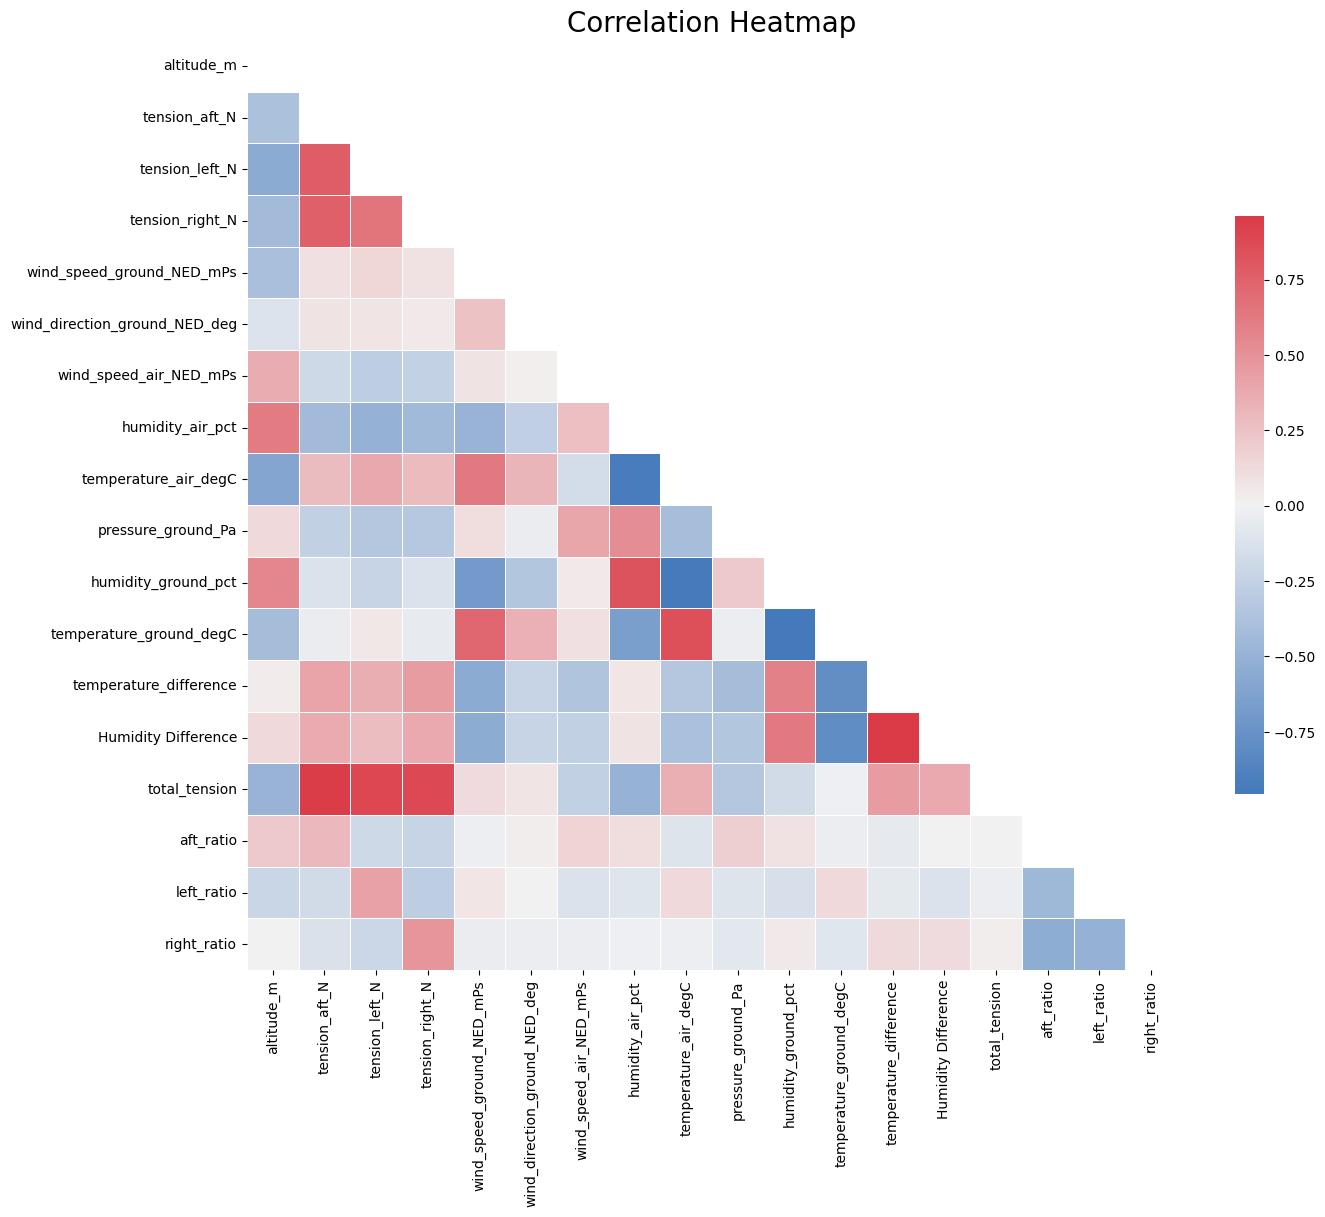

In [ ]:
# Heat Map of Correlation
data_new = pd.read_csv('altaeros_flight_data_20230418.csv')
data_new['speed_diff_air'] = data_new['wind_speed_air_NED_mPs'].diff()
data_new['speed_diff_ground'] = data_new['wind_speed_ground_NED_mPs'].diff()
data_new['temperature_difference']=data_new['temperature_air_degC']-data_new['temperature_ground_degC']
data_new['ground_pressure_rate'] = data_new['pressure_ground_Pa'].diff()
data_new['Humidity Difference']=data_new['humidity_ground_pct']-data_new['humidity_air_pct']
data_new['total_tension'] = data_new['tension_aft_N'] + data_new['tension_left_N'] + data_new['tension_right_N']
data_new['aft_ratio'] = data_new['tension_aft_N'] / data_new['total_tension'] 
data_new['left_ratio'] = data_new['tension_left_N'] / data_new['total_tension']
data_new['right_ratio'] = data_new['tension_right_N'] / data_new['total_tension']
# Calculate rate of change of tension ratios(per second)
data_new['aft_ratio_rate'] = (data_new['aft_ratio'].diff())
data_new['left_ratio_rate'] = (data_new['left_ratio'].diff())
data_new['right_ratio_rate'] = (data_new['right_ratio'].diff())
import seaborn as sns
# Calculate the correlation matrix
data_new.drop(['wind_direction_air_NED_deg', 'wind_elevation_air_NED_deg'], axis=1, inplace=True)
data_new.drop(['aft_ratio_rate','left_ratio_rate','right_ratio_rate'], axis=1, inplace=True)
data_new.drop(['speed_diff_ground','speed_diff_air','ground_pressure_rate'], axis=1, inplace=True)
corr = data_new.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Create a colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=20)
plt.show()



In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# # Load the data
# data = pd.read_csv('altaeros_flight_data_20230418.csv')

# # Convert the 'Time' column to datetime format and sort the data by time
# data['Time'] = pd.to_datetime(data['Time'])
# data = data.sort_values('Time')

# # Calculate the change in wind speed over 60-second periods and create the gust and gust_intensity columns
# data['wind_speed_change'] = data['wind_speed_air_NED_mPs'].diff(periods=60)
# data['gust'] = data['wind_speed_change'] > 3
# data['gust_intensity'] = data['wind_speed_change'] * data['gust']

# # Drop the first 60 rows with null values
# data = data.dropna()

# # Extract features and target
# features = data[['wind_speed_air_NED_mPs', 'pressure_ground_Pa']]
# target = data['gust_intensity']

# # Normalize the features and target
# scaler_features = MinMaxScaler()
# scaler_target = MinMaxScaler()
# features_scaled = scaler_features.fit_transform(features)
# target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# # Create sequences
# def create_sequences(features, target, steps):
#     X, y = [], []
#     for i in range(len(features) - steps):
#         X.append(features[i:(i + steps)])
#         y.append(target[i + steps])
#     return np.array(X), np.array(y)

# X, y = create_sequences(features_scaled, target_scaled, steps=60)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(units=100, return_sequences=True, input_shape=(60, 2)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# # Fit the model and save the history
# history = model.fit(
#     X_train, y_train, 
#     epochs=100, 
#     batch_size=64, 
#     validation_split=0.2, 
#     callbacks=[early_stopping]
# )

# # Evaluate the model
# loss = model.evaluate(X_test, y_test)

# # Make predictions
# y_pred = model.predict(X_test)

# # Inverse transform to get predictions in original scale
# y_pred = scaler_target.inverse_transform(y_pred)

# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

# # Plot training & validation loss values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()

# # Plot actual vs predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(y_test, color='blue', label='Actual')
# plt.plot(y_pred, color='red', label='Predicted')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=db052f45-54fd-4c84-9a72-a96e050808ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>